## CIFAR-10 Dataset

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

### `Activating GPU`

In [ ]:
# Device configuration
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)

On_GPU = int(input('Run on GPU (Activate - 1/Deactivate - 0) : '))

if On_GPU:
      if torch.backends.mps.is_available():
            device = torch.device("mps")
            print('Running on the GPU')
            
      else:
            device = torch.device("cpu")
            print('Running on the CPU')
else:
      device = torch.device("cpu")
      print('Running on the CPU')


PyTorch version: 2.1.1
Torchvision version: 0.16.1
Running on the GPU


In [ ]:
batch_size = 100

# dataset has PILImage images of range [0, 1]. 
# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


# CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class
train_dataset = torchvision.datasets.CIFAR10(root='Data', train=True,
                                        download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='Data', train=False,
                                       download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)


classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


### `Visualize Some Images`

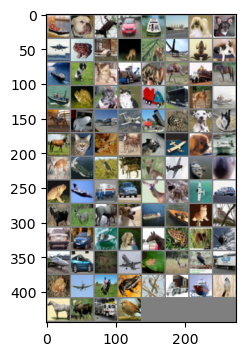

In [ ]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)


# show 
plt.figure(figsize=(10,4))
imshow(torchvision.utils.make_grid(images))


### `Creating My CNN Model`

In [ ]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) # 3-color chanels , 6-output color channel size , 5 - kernel size
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5) # 6-color channels , 16-output color channel size, 5 - kernel size
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10) #10 classes

    def forward(self, x):
        # x -> n, 32, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  # -> n, 6, 14, 14
        x = self.pool(F.relu(self.conv2(x)))  # -> n, 16, 5, 5
        x = x.view(-1, 16 * 5 * 5)            # -> n, 400
        x = F.relu(self.fc1(x))               # -> n, 120
        x = F.relu(self.fc2(x))               # -> n, 84
        x = self.fc3(x)                       # -> n, 10
        return x


learning_rate = 0.001

model = ConvNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


### `Training !!!`

In [ ]:
n_total_steps = len(train_loader)
best_loss = 100
num_epochs = 20


for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2500 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')
            
            
        # Saving The Best Params !!! 
        
        if loss.item() < best_loss: 
            best_loss = loss.item()
            torch.save(model, 'best-model.pt')
            torch.save(model.state_dict(), 'best-model-parameters.pt')


print("Finished Training !!!")


Epoch [1/20], Step [2500/5000], Loss: 2.2775
Epoch [1/20], Step [5000/5000], Loss: 2.2830
Epoch [2/20], Step [2500/5000], Loss: 2.2907
Epoch [2/20], Step [5000/5000], Loss: 2.1664
Epoch [3/20], Step [2500/5000], Loss: 2.0490
Epoch [3/20], Step [5000/5000], Loss: 1.8769
Epoch [4/20], Step [2500/5000], Loss: 1.8701
Epoch [4/20], Step [5000/5000], Loss: 1.6195
Epoch [5/20], Step [2500/5000], Loss: 1.7293
Epoch [5/20], Step [5000/5000], Loss: 1.7145
Epoch [6/20], Step [2500/5000], Loss: 1.8251
Epoch [6/20], Step [5000/5000], Loss: 1.7312
Epoch [7/20], Step [2500/5000], Loss: 1.8814
Epoch [7/20], Step [5000/5000], Loss: 1.6534
Epoch [8/20], Step [2500/5000], Loss: 1.4150
Epoch [8/20], Step [5000/5000], Loss: 1.5506
Epoch [9/20], Step [2500/5000], Loss: 2.4548
Epoch [9/20], Step [5000/5000], Loss: 1.2037
Epoch [10/20], Step [2500/5000], Loss: 1.6551
Epoch [10/20], Step [5000/5000], Loss: 1.2627
Epoch [11/20], Step [2500/5000], Loss: 1.2637
Epoch [11/20], Step [5000/5000], Loss: 1.9780
Epoch 

### `Testing !!!`

In [ ]:
with torch.no_grad():
    
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    
    for images, labels in train_loader:
        
        images = images.to(device)
        labels = labels.to(device)
        
        # Load the entire model
        model = torch.load('best-model.pt')
        
        outputs = model(images)
        
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        

        for i in range(len(labels)):
            label = labels[i].item()
            pred = predicted[i].item()
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')

print('--------------------------')

with torch.no_grad():
    
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    
    for images, labels in test_loader:
        
        images = images.to(device)
        labels = labels.to(device)
        
        # Load the entire model
        model = torch.load('best-model.pt')
        
        outputs = model(images)
        
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        

        for i in range(len(labels)):
            label = labels[i].item()
            pred = predicted[i].item()
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')


Accuracy of the network: 54.826 %
Accuracy of plane: 53.02 %
Accuracy of car: 72.18 %
Accuracy of bird: 38.62 %
Accuracy of cat: 37.42 %
Accuracy of deer: 39.44 %
Accuracy of dog: 43.88 %
Accuracy of frog: 64.1 %
Accuracy of horse: 61.28 %
Accuracy of ship: 73.2 %
Accuracy of truck: 65.12 %
Accuracy of the network: 53.69 %
Accuracy of plane: 53.6 %
Accuracy of car: 69.8 %
Accuracy of bird: 37.4 %
Accuracy of cat: 35.5 %
Accuracy of deer: 37.9 %
Accuracy of dog: 42.8 %
Accuracy of frog: 65.5 %
Accuracy of horse: 61.7 %
Accuracy of ship: 70.1 %
Accuracy of truck: 62.6 %


## `VGG-19 CNN`

In [ ]:
class VGG19_CNN(nn.Module):
      
    def __init__(self):
        super(VGG19_CNN, self).__init__()
        
        # nn.Conv2d(3, 6, 5) -->   3-color chanels , 6-output color channel size , 5 - kernel size
        # nn.MaxPool2d(2, 2) -->   2-kernel size , 2-stride
    
        
        self.conv = nn.Sequential(
            nn.Conv2d(3, 64, 5, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, 5, padding=1),
            nn.ReLU(inplace=True),
            # nn.MaxPool2d(2, 2),
            
            nn.Conv2d(64, 128, 5, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, 5, padding=1),
            nn.ReLU(inplace=True),
            # nn.MaxPool2d(2, 2),
            
            nn.Conv2d(128, 256, 5, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, 5, padding=1),
            nn.ReLU(inplace=True),
            # nn.MaxPool2d(2, 2),
            nn.Conv2d(256, 256, 5, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, 5, padding=1),
            nn.ReLU(inplace=True),
            # nn.MaxPool2d(2, 2),
            
            nn.Conv2d(256, 512, 5, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, 5, padding=1),
            nn.ReLU(inplace=True),
            # nn.MaxPool2d(2, 2),
            nn.Conv2d(512, 512, 5, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, 5, padding=1),
            nn.ReLU(inplace=True),
            # nn.MaxPool2d(2, 2),
            nn.Conv2d(512, 512, 5, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, 5, padding=1),
            nn.ReLU(inplace=True),
            # nn.MaxPool2d(2, 2),
            nn.Conv2d(512, 512, 5, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, 5, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2),
            
            nn.Conv2d(512, 1024, 5, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(1024, 1024, 5, padding=1),
            nn.ReLU(inplace=True),
            # nn.MaxPool2d(2, 2),
            nn.Conv2d(1024, 1024, 5, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(1024, 1024, 5, padding=1),
            nn.ReLU(inplace=True),
            # nn.MaxPool2d(2, 2),
            nn.Conv2d(1024, 1024, 5, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(1024, 1024, 5, padding=1),
            nn.ReLU(inplace=True),
            # nn.MaxPool2d(2, 2),
            nn.Conv2d(1024, 1024, 5, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(1024, 1024, 5, padding=1),
            nn.ReLU(inplace=True),
            # nn.MaxPool2d(2, 2),
            nn.Conv2d(1024, 1024, 5, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(1024, 1024, 5, padding=1),
            nn.ReLU(inplace=True),
            # nn.MaxPool2d(2, 2),
            nn.Conv2d(1024, 1024, 5, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(1024, 1024, 5, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2),
        )
        
        self.avgpool = nn.AdaptiveAvgPool2d((7, 7))
        self.classifier = nn.Sequential(
            # Fully connected layers
            nn.Linear(1024 * 7 * 7, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 10)
        )
        
        

    def forward(self, x):
        x = self.conv(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x



model_vgg = VGG19_CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_vgg.parameters(), lr=learning_rate)

In [ ]:
n_total_steps = len(train_loader)
best_loss = 100
num_epochs = 200


for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 250 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')
            
            
        # Saving The Best Params !!! 
        
        if loss.item() < best_loss: 
            best_loss = loss.item()
            torch.save(model, 'best-model.pt')
            torch.save(model.state_dict(), 'best-model-parameters.pt')


print("Finished Training !!!")


Epoch [1/200], Step [250/500], Loss: 1.1741
Epoch [1/200], Step [500/500], Loss: 1.3673
Epoch [2/200], Step [250/500], Loss: 1.1495
Epoch [2/200], Step [500/500], Loss: 1.3752
Epoch [3/200], Step [250/500], Loss: 1.2188
Epoch [3/200], Step [500/500], Loss: 1.3010
Epoch [4/200], Step [250/500], Loss: 1.3423
Epoch [4/200], Step [500/500], Loss: 1.4432
Epoch [5/200], Step [250/500], Loss: 1.3532
Epoch [5/200], Step [500/500], Loss: 1.2584
Epoch [6/200], Step [250/500], Loss: 1.3631
Epoch [6/200], Step [500/500], Loss: 1.3778
Epoch [7/200], Step [250/500], Loss: 1.2816
Epoch [7/200], Step [500/500], Loss: 1.2517
Epoch [8/200], Step [250/500], Loss: 1.2894
Epoch [8/200], Step [500/500], Loss: 1.1662
Epoch [9/200], Step [250/500], Loss: 1.2857
Epoch [9/200], Step [500/500], Loss: 1.2307
Epoch [10/200], Step [250/500], Loss: 1.3276
Epoch [10/200], Step [500/500], Loss: 1.2784
Epoch [11/200], Step [250/500], Loss: 1.1428
Epoch [11/200], Step [500/500], Loss: 1.3441
Epoch [12/200], Step [250/50

In [ ]:
with torch.no_grad():
    
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    
    for images, labels in train_loader:
        
        images = images.to(device)
        labels = labels.to(device)
        
        # Load the entire model
        model = torch.load('best-model.pt')
        
        outputs = model(images)
        
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        

        for i in range(len(labels)):
            label = labels[i].item()
            pred = predicted[i].item()
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')

print('--------------------------')

with torch.no_grad():
    
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    
    for images, labels in test_loader:
        
        images = images.to(device)
        labels = labels.to(device)
        
        # Load the entire model
        model = torch.load('best-model.pt')
        
        outputs = model(images)
        
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        

        for i in range(len(labels)):
            label = labels[i].item()
            pred = predicted[i].item()
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')


Accuracy of the network: 54.826 %
Accuracy of plane: 53.02 %
Accuracy of car: 72.18 %
Accuracy of bird: 38.62 %
Accuracy of cat: 37.42 %
Accuracy of deer: 39.44 %
Accuracy of dog: 43.88 %
Accuracy of frog: 64.1 %
Accuracy of horse: 61.28 %
Accuracy of ship: 73.2 %
Accuracy of truck: 65.12 %
--------------------------
Accuracy of the network: 53.69 %
Accuracy of plane: 53.6 %
Accuracy of car: 69.8 %
Accuracy of bird: 37.4 %
Accuracy of cat: 35.5 %
Accuracy of deer: 37.9 %
Accuracy of dog: 42.8 %
Accuracy of frog: 65.5 %
Accuracy of horse: 61.7 %
Accuracy of ship: 70.1 %
Accuracy of truck: 62.6 %
